### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

### Load the MNIST dataset and preprocess it

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28*28).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28*28).astype(np.float32) / 255.0
y_test_labels = y_test.copy()
y_train = pd.Series(y_train, dtype="category").cat.set_categories(range(10))
y_test = pd.Series(y_test, dtype="category").cat.set_categories(range(10))

# One-hot encode
y_train = pd.get_dummies(y_train).to_numpy()
y_test = pd.get_dummies(y_test).to_numpy()

### Define the activation and utility functions that will be required later.

In [3]:
# Define activation functions
def sigmoid(z):  # For hidden layer
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z): # Needed while back propagating
    return sigmoid(z) * (1 - sigmoid(z))

def softmax(z): # For output layer
    exp = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true): # To calculate loss
    eps = 1e-10
    return -np.mean(np.sum(y_true * np.log(y_pred + eps), axis=1))

def accuracy(y_pred, y_true): # To calculate performance on test data
    return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))


### Initialize Parameters of the neural network (Can be changed)

In [4]:
# Initialize parameters
input_size = 784
hidden_size = 64
output_size = 10

# Weights initialized with mean 0 and std dev 0.005
# Biases initialized as 0
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

### Train the model using gradient descent

In [5]:
# Training
epochs = 10
batch_size = 64  # Mini batch Gradient Descent
learning_rate = 0.1  # Can be changed

for epoch in range(epochs):
    # Shuffle the training data for each epoch to promote generalization and break unnunnecessary patterns
    permutation = np.random.permutation(len(x_train))
    x_train = x_train[permutation]
    y_train = y_train[permutation]

    # Iterate on each batch
    for i in range(0, len(x_train), batch_size):
        X_batch = x_train[i:i+batch_size]
        Y_batch = y_train[i:i+batch_size]

        # Forward pass
        Z1 = np.dot(X_batch, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = softmax(Z2)

        # Backward pass
        dZ2 = A2 - Y_batch
        dW2 = np.dot(A1.T, dZ2) / batch_size
        db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * sigmoid_deriv(Z1)
        dW1 = np.dot(X_batch.T, dZ1) / batch_size
        db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

        # Update weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # Evaluation
    Z1 = np.dot(x_test, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    loss = cross_entropy_loss(A2, y_test)
    acc = accuracy(A2, y_test)

    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")


Epoch 1, Loss: 0.5325, Accuracy: 0.8636
Epoch 2, Loss: 0.3496, Accuracy: 0.9059
Epoch 3, Loss: 0.2984, Accuracy: 0.9150
Epoch 4, Loss: 0.2717, Accuracy: 0.9227
Epoch 5, Loss: 0.2502, Accuracy: 0.9287
Epoch 6, Loss: 0.2347, Accuracy: 0.9336
Epoch 7, Loss: 0.2204, Accuracy: 0.9369
Epoch 8, Loss: 0.2098, Accuracy: 0.9405
Epoch 9, Loss: 0.1992, Accuracy: 0.9432
Epoch 10, Loss: 0.1896, Accuracy: 0.9450


### Prediction function to predict any digit in the dataset by it's index

In [6]:
def predict(index):
    sample_image = x_test[index].reshape(1, -1)  # Flattened input
    true_label = y_test_labels[index]            # Actual label not one hot encoded
    
    # Forward pass
    Z1 = np.dot(sample_image, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    
    # Predicted class
    predicted_label = np.argmax(A2)
    
    # Display the image
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
    plt.axis('off')
    plt.show()

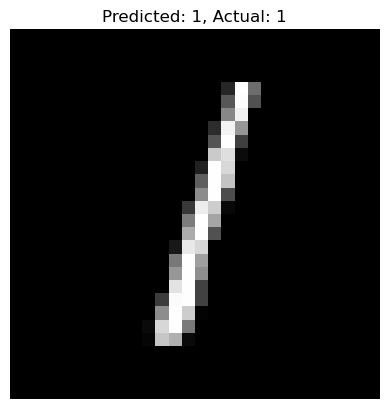

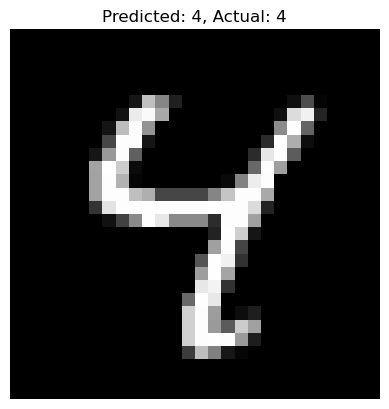

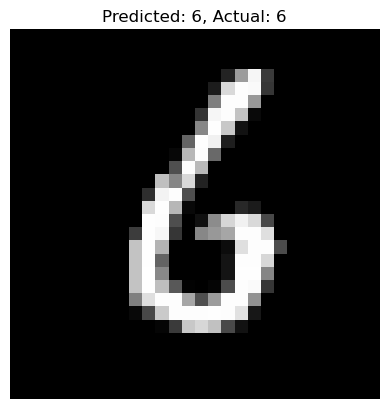

In [7]:
predict(2)
predict(6)
predict(50)